<a href="https://colab.research.google.com/github/0-lingual/DBGAPS/blob/main/MVO_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas yfinance schedule PyPortfolioOpt finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 2.1 MB/s eta 0:00:00


In [ ]:

import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime

# ETF 목록
etf_list = {
    'KOSPI': '069500',
    'KOSDAQ': '232080',
    'S&P500': '143850',
    'STOXX': '195930',
    'Nikkei': '241180',
    'CSI': '192090',
    # 'BOND_3': '148070',
    # 'BOND_5': '136340',
    # 'BOND_10': '182490',
    'Gold': '132030',
    'WTI': '130680',
    'KOSPI(I)': '114800',
    'KRW/USD': '138230',
    'KRWUSD': '139660',
    # 'KOSEF 단기자금': '130730'
}

# 시작 날짜와 종료 날짜 설정
start_date = '2018-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

def fetch_etf_data(etf_dict, start, end):
    df_list = []
    for name, code in etf_dict.items():
        data = fdr.DataReader(code, start, end)
        data = data[['Close']]
        data.columns = [name]
        df_list.append(data)
    return pd.concat(df_list, axis=1)

# ETF 데이터 가져오기
etf_df = fetch_etf_data(etf_list, start_date, end_date)

# 데이터 저장
etf_df.to_csv('etf_df.csv')

print("ETF 데이터가 etf_df.csv 파일에 저장되었습니다.")



ETF 데이터가 etf_df.csv 파일에 저장되었습니다.


In [ ]:
etf_df

,KOSPI,KOSDAQ,S&P500,STOXX,Nikkei,CSI,Gold,WTI,KOSPI(I),KRW/USD,KRWUSD
Date,,,,,,,,,,,
2018-01-02,28609,13994,31770,11485,11871,8309,9805,4410,5940,10234,11735
2018-01-03,28730,14218,31995,11490,11922,8384,9835,4380,5925,10262,11700
2018-01-04,28506,13825,32205,11590,12300,8384,9805,4505,5975,10238,11735
2018-01-05,28892,14358,32350,11755,12355,8448,9870,4490,5900,10248,11720
2018-01-08,29085,14753,32560,11820,12429,8452,9870,4470,5855,10276,11675
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,37530,14400,60045,18075,20560,8695,14360,4495,4110,14955,8615
2024-06-14,37655,14205,60090,17710,20540,8765,14340,4480,4100,15015,8580
2024-06-17,37450,14205,60025,17485,20265,8785,14395,4480,4125,15045,8565


In [ ]:
etf_df.isnull().sum()

KOSPI       0
KOSDAQ      0
S&P500      0
STOXX       0
Nikkei      0
CSI         0
Gold        0
WTI         0
KOSPI(I)    0
KRW/USD     0
KRWUSD      0
dtype: int64

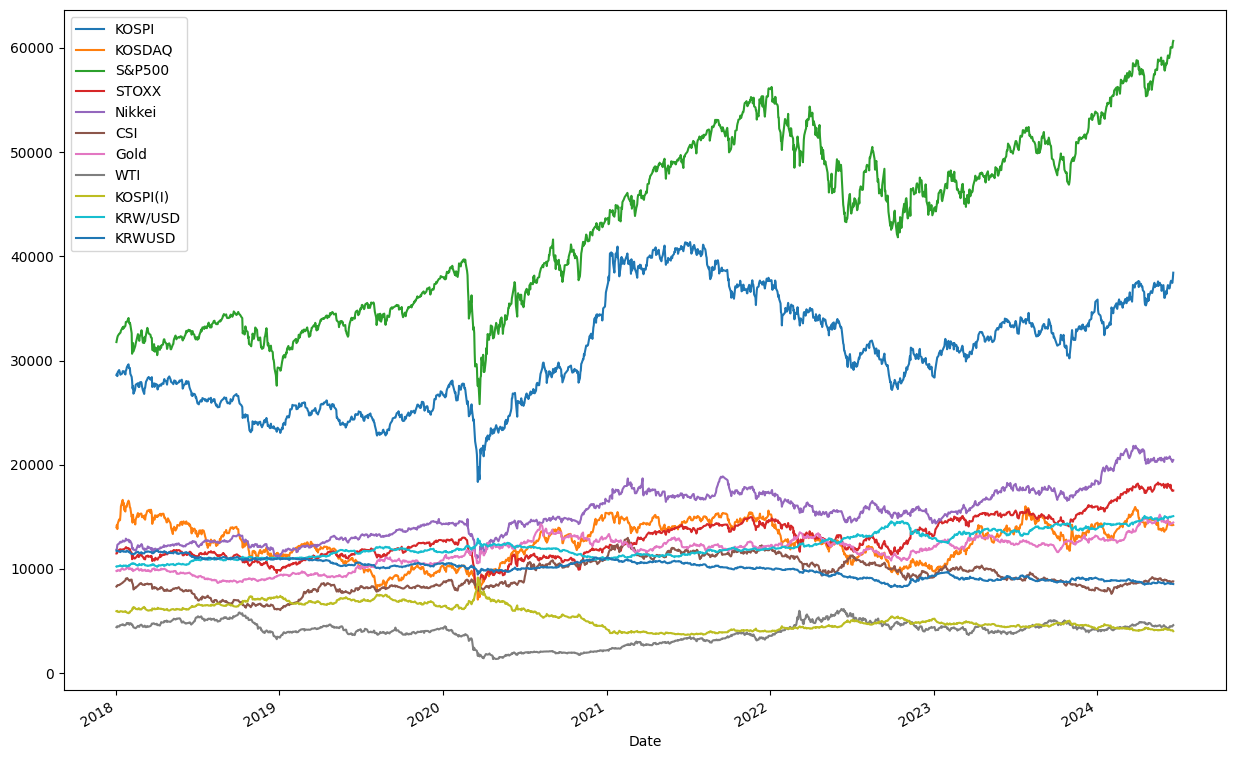

In [ ]:
etf_df.plot(figsize=(15,10));

In [ ]:
import pypfopt
pypfopt.__version__

'1.5.5'

In [ ]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(etf_df, frequency=252)
sample_cov

,KOSPI,KOSDAQ,S&P500,STOXX,Nikkei,CSI,Gold,WTI,KOSPI(I),KRW/USD,KRWUSD
KOSPI,0.035772,0.039167,0.024097,0.022359,0.015533,0.012835,0.005142,0.025936,-0.036323,-0.009896,0.009769
KOSDAQ,0.039167,0.087158,0.028766,0.025762,0.017956,0.018310,0.005072,0.024411,-0.039994,-0.012267,0.011951
S&P500,0.024097,0.028766,0.036089,0.027165,0.019479,0.011950,0.004349,0.028504,-0.024491,-0.008116,0.008157
STOXX,0.022359,0.025762,0.027165,0.037706,0.018107,0.010646,0.001294,0.020462,-0.022782,-0.007174,0.007188
Nikkei,0.015533,0.017956,0.019479,0.018107,0.030216,0.008428,0.002415,0.014279,-0.015831,-0.002337,0.002238
CSI,0.012835,0.018310,0.011950,0.010646,0.008428,0.038216,0.001960,0.014596,-0.013236,-0.003009,0.002971
Gold,0.005142,0.005072,0.004349,0.001294,0.002415,0.001960,0.021904,0.008011,-0.005137,-0.004196,0.004216
WTI,0.025936,0.024411,0.028504,0.020462,0.014279,0.014596,0.008011,0.159077,-0.026327,-0.007656,0.008038
KOSPI(I),-0.036323,-0.039994,-0.024491,-0.022782,-0.015831,-0.013236,-0.005137,-0.026327,0.037175,0.010057,-0.009932
KRW/USD,-0.009896,-0.012267,-0.008116,-0.007174,-0.002337,-0.003009,-0.004196,-0.007656,0.010057,0.007184,-0.006983


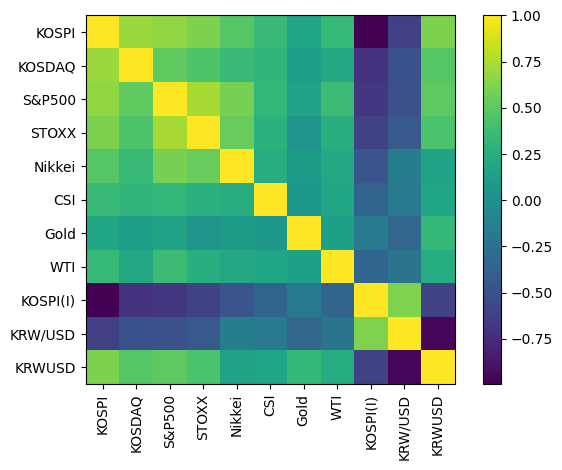

In [ ]:
plotting.plot_covariance(sample_cov, plot_correlation=True);


In [ ]:
from pypfopt import expected_returns

mu = expected_returns.ema_historical_return(etf_df)
mu

KOSPI       0.159884
KOSDAQ      0.112352
S&P500      0.199553
STOXX       0.166486
Nikkei      0.162072
CSI        -0.026146
Gold        0.139232
WTI         0.127217
KOSPI(I)   -0.094666
KRW/USD     0.103571
KRWUSD     -0.053310
Name: 2024-06-19 00:00:00, dtype: float64

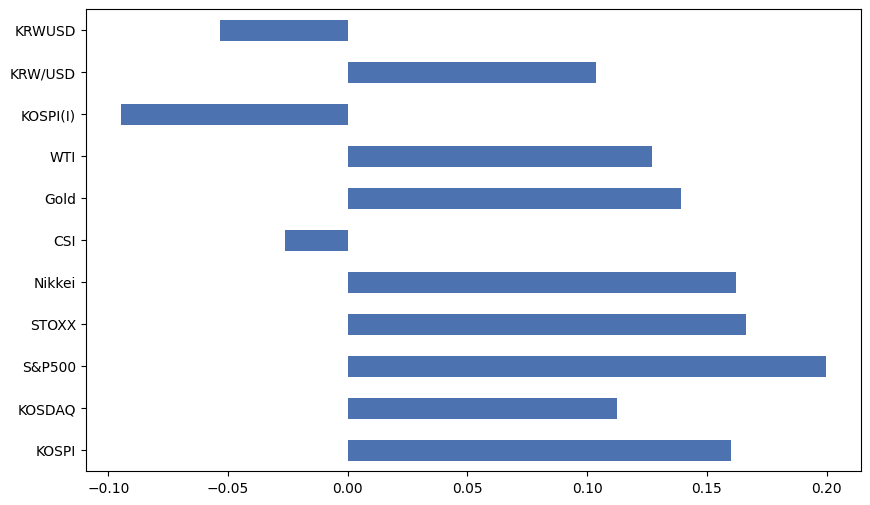

In [ ]:
mu.plot.barh(figsize=(10,6));

In [ ]:
sector_mapper = {
    'KOSPI': 'korea_stock',
    'KOSDAQ': 'korea_stock',
    'S&P500': 'stocks',
    'STOXX': 'stocks',
    'Nikkei': 'stocks',
    'CSI': 'stocks',
    # 'BOND_3': 'bonds',
    # 'BOND_5': 'bonds',
    # 'BOND_10': 'bonds',
    'Gold': 'derives',
    'WTI': 'derives',
    'KOSPI(I)': 'inverse',
    'KRW/USD': 'FX',
    'KRWUSD': 'FX',
    }
sector_lower = {
        'korea_stock':0.1,
        'stocks':0.3,
        # 'bonds':0.2,
        'derives':0.05,

    }

sector_upper = {
     'korea_stock':0.4,
     'stocks':0.4,
    #  'bonds':0.2,
     'derives':0.2,
     'inverse':0.1,
     'FX':0.2,
    }



In [ ]:
from pypfopt import DiscreteAllocation
from pypfopt import EfficientFrontier

mu = expected_returns.ema_historical_return(etf_df, frequency=252)
S = risk_models.sample_cov(etf_df, frequency=252)

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.max_sharpe()
weights = ef.clean_weights()

In [ ]:
weights

OrderedDict([('KOSPI', 0.18628),
             ('KOSDAQ', 0.0),
             ('S&P500', 0.13664),
             ('STOXX', 0.0595),
             ('Nikkei', 0.11758),
             ('CSI', 0.0),
             ('Gold', 0.2),
             ('WTI', 0.0),
             ('KOSPI(I)', 0.1),
             ('KRW/USD', 0.2),
             ('KRWUSD', 0.0)])

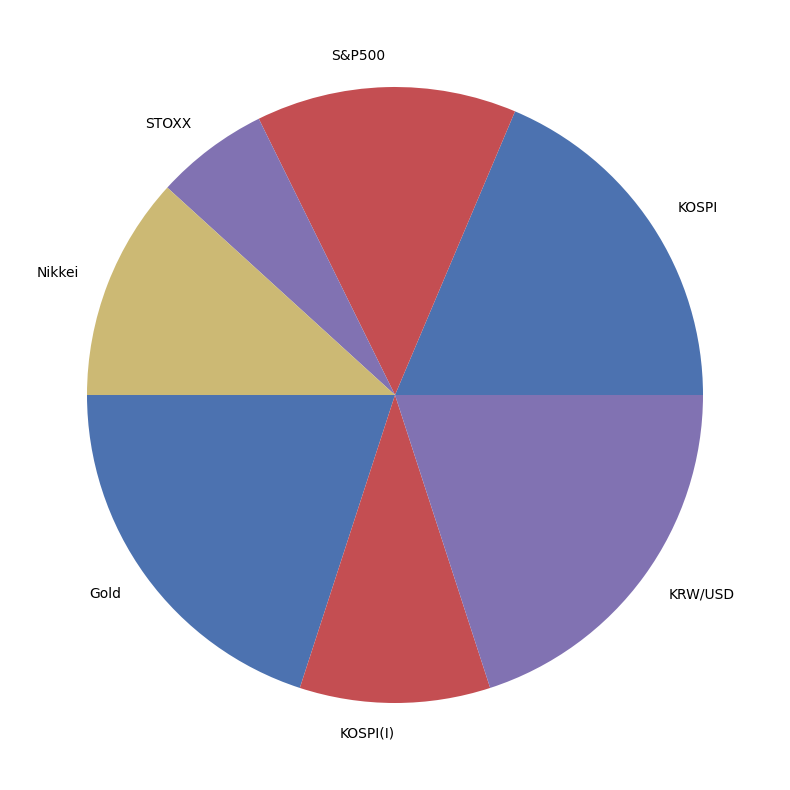

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
# import FinanceDataReader as fdr
# import pandas as pd
# import schedule
# import time
# from datetime import datetime, timedelta
# import threading
# import os

# # ETF 목록
# etf_list = {
#     'KODEX 200': '069500',
#     'TIGER 코스닥150': '232080',
#     'TIGER 미국S&P500선물(H)': '143850',
#     'TIGER 유로스탁스50(합성,H)': '195930',
#     'ACE 일본Nikkei225(H)': '241180',
#     'TIGER 차이나CSI300': '192090',
#     'KOSEF 국고채10년': '148070',
#     'KBSTAR 중기우량회사채': '136340',
#     'TIGER 단기선진하이일드(합성,H)': '182490',
#     'KODEX 골드선물(H)': '132030',
#     'TIGER 원유선물Enhanced(H)': '130680',
#     'KODEX 인버스': '114800',
#     'KOSEF 미국달러선물': '138230',
#     'KOSEF 미국달러선물인버스': '139660',
#     'KOSEF 단기자금': '130730'
# }

# # 첫 실행 시 초기 데이터 로드
# def initial_load():
#     start_date = '2019-01-01'
#     end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
#     data = {'날짜': [], '종목명': [], '종가': []}

#     for name, code in etf_list.items():
#         df = fdr.DataReader(code, start=start_date, end=end_date)
#         for date, row in df.iterrows():
#             data['날짜'].append(date.strftime('%Y-%m-%d'))
#             data['종목명'].append(name)
#             data['종가'].append(row['Close'])

#     df_initial = pd.DataFrame(data)
#     df_initial.to_csv('etf_prices.csv', mode='w', header=True, index=False)
#     print("Initial data load complete.")

# # 매일 데이터 업데이트 함수
# def update_etf_data():
#     today = datetime.now().strftime('%Y-%m-%d')
#     data = {'날짜': [], '종목명': [], '종가': []}

#     for name, code in etf_list.items():
#         df = fdr.DataReader(code, start=today, end=today)
#         if not df.empty:
#             closing_price = df['Close'].iloc[-1]
#             data['날짜'].append(today)
#             data['종목명'].append(name)
#             data['종가'].append(closing_price)

#     df_daily = pd.DataFrame(data)
#     df_daily.to_csv('etf_prices.csv', mode='a', header=False, index=False)
#     print(f"Data updated for {today}")

# # 스케줄러를 별도의 스레드에서 실행
# def run_schedule():
#     while True:
#         schedule.run_pending()
#         time.sleep(1)

# # 매일 특정 시간에 데이터 업데이트
# schedule.every().day.at("17:00").do(update_etf_data)

# # 첫 데이터 로드 실행
# if not os.path.exists('etf_prices.csv'):
#     initial_load()

# # 첫 데이터 업데이트 즉시 실행
# update_etf_data()

# # 스케줄러 스레드 시작
# scheduler_thread = threading.Thread(target=run_schedule)
# scheduler_thread.daemon = True
# scheduler_thread.start()

# # 메인 프로그램 실행
# print("Scheduler started. Waiting for the scheduled time...")